In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\pyml_scripts\chapter07_knn\winequality-red.csv', header=0, sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [2]:
clf_k3 = KNeighborsClassifier(n_neighbors=3)

In [3]:
clf_k3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
#訓練準確度
clf_k3.score(X_train,y_train)

0.745113369820172

In [5]:
#測試準確度
clf_k3.score(X_test,y_test)

0.475

In [6]:
clf_k7 = KNeighborsClassifier(n_neighbors=7)
clf_k7.fit(X_train,y_train)
print("訓練準確度:",clf_k7.score(X_train,y_train))
print("一般準確度",clf_k7.score(X_test,y_test))

訓練準確度: 0.6153244722439406
一般準確度 0.478125


In [7]:
#距離相關演算法應該先進行無量綱化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [8]:
Xs = StandardScaler().fit_transform(X)
Xn = Normalizer().fit_transform(X)
Xm = MinMaxScaler().fit_transform(X)

random_state=np.random.randint(1)

Xs_train,Xs_test,y_train,y_test = train_test_split(Xs,y,test_size=0.2,random_state=random_state)
Xn_train,Xn_test,y_train,y_test = train_test_split(Xn,y,test_size=0.2,random_state=random_state)
Xm_train,Xm_test,y_train,y_test = train_test_split(Xn,y,test_size=0.2,random_state=random_state)
clf = KNeighborsClassifier()

In [9]:
clf.fit(Xs_train,y_train)
clf.score(Xs_test,y_test)

0.60625

In [10]:
clf.fit(Xn_train,y_train)
clf.score(Xn_test,y_test)

0.475

In [11]:
clf.fit(Xm_train,y_train)
clf.score(Xm_test,y_test)

0.475

In [12]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Noto Sans TC'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


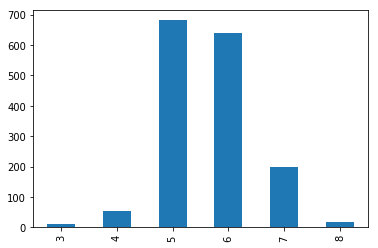

In [13]:
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [14]:
#如何確定最佳的K值
clf_k20 = KNeighborsClassifier(n_neighbors=20)
clf_k20.fit(Xs_train,y_train)
print("訓練準確度:",clf_k20.score(Xs_train,y_train))
print("一般準確度",clf_k20.score(Xs_test,y_test))

訓練準確度: 0.6215793588741204
一般準確度 0.5875


In [15]:
clf_k30 = KNeighborsClassifier(n_neighbors=30)
clf_k30.fit(Xs_train,y_train)
print("訓練準確度:",clf_k30.score(Xs_train,y_train))
print("一般準確度",clf_k30.score(Xs_test,y_test))

訓練準確度: 0.6121970289288506
一般準確度 0.603125


In [16]:
clf_k100 = KNeighborsClassifier(n_neighbors=100)
clf_k100.fit(Xs_train,y_train)
print("訓練準確度:",clf_k100.score(Xs_train,y_train))
print("一般準確度",clf_k100.score(Xs_test,y_test))

訓練準確度: 0.5949960906958561
一般準確度 0.61875
